In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [3]:
from sklearn.datasets import fetch_openml

# Загружаем данные из https://www.openml.org/d/554
X, y = fetch_openml('mnist_784', return_X_y = True, as_frame = False)

In [4]:
N, d = X.shape
N, d #70000 цифр, 784 - картинка из 28*28 пискелей

(70000, 784)

In [5]:
def draw_digit(Img, digit):
    plt.xticks([])
    plt.yticks([])
    plt.imshow(np.reshape(Img, (28, 28))) #Выводим написанное число
    plt.text(0, 27, str(digit), color = 'b') #Выводим маленькое число в левом нижнем углу
    plt.set_cmap('binary')     

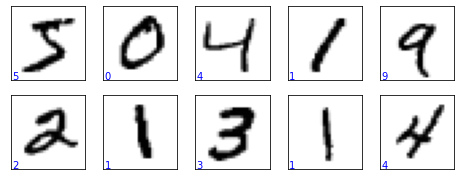

In [6]:
plt.figure(figsize = (8, 3)) 
for i in range(10):
    plt.subplot(2, 5, i+1) #Выводим 2 строчки по 5 картинок
    draw_digit(X[i, :], y[i])

# 1. Метод Kmeans

In [7]:
from sklearn.cluster import KMeans

In [8]:
Xtest = X[0:5000]
Ytest = y[0:5000]

In [9]:
Xtest.shape

(5000, 784)

In [10]:
Ytest.shape

(5000,)

In [11]:
model.fit(Xtest.data, Ytest.data)

NameError: name 'model' is not defined

In [ ]:
all_predictions = model.predict(Xtest.data, Ytest.data)

In [ ]:
print(all_predictions)

In [ ]:
Ytest = Ytest.astype('int8')
Ytest

In [ ]:
from sklearn import metrics
metrics.rand_score(Ytest, all_predictions)

Показатель RI равен примерно 0.879

# 2. Метод BIRCH

In [ ]:
from sklearn.cluster import Birch
model2 = Birch(n_clusters = 10)
model2.fit(Xtest.data)
Birch(n_clusters = 10)

In [ ]:
all_predictions2 = model2.predict(Xtest.data)

In [ ]:
all_predictions2

In [ ]:
metrics.rand_score(Ytest, all_predictions2)

Показатель RI равен примерно 0.904

# 3. Метод Meanshift

In [ ]:
from sklearn.cluster import MeanShift
model3 = MeanShift(bandwidth = 2).fit(Xtest.data)
MeanShift(bandwidth = 2)

In [ ]:
all_predictions3 = model3.predict(Xtest.data)

In [ ]:
all_predictions3

In [ ]:
metrics.rand_score(Ytest, all_predictions3)

Показатель RI равен примерно 0.900

Таким образом наилучший результат показал метод BIRCH